<h1 align="center">MSIN0114: Business Analytics Consulting Project</h1>
<h2 align="center">EDA and pre-processing for multi-classification</h2>

# Table of Contents

* [Part 3](#part3): Pre-processing
    * [3.1](#3_1): Missing values
    * [3.2](#3_2): Conversion
    * [3.3](#3_3): Scaling
    * [3.4](#3_4): Feature engineering
    * [3.5](#3_5): Encoding
<br />
<br />
* [Part 4](#part4): Exploratory data analysis
    * [4.1](#3_1): Target variables
    * [4.2](#3_2): Extended dataframe
    * [4.3](#3_3): Compact dataframe
    * [4.4](#3_4): Outliers

## Notebook Setup

In [1]:
# Essentials
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import sqlite3
import pyodbc
import numpy as np

# Image creation and display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Other
import itertools as it
import io
import os
os.sys.path
import sys
import glob
import concurrent.futures
from __future__ import print_function
import binascii
import struct
from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import datetime, time
import functools, operator
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

In [2]:
df = pd.read_csv('../csv-files/project_lvl.csv')

## Part 3: <a class="anchor" id="part3"></a> Pre-processing

### 3.1 <a class="anchor" id="3_1"></a> Missing values

In [97]:
# Number of columns having null values in the dataset
cols = df.columns[df.isnull().any()].to_list()

for c in cols:
    print(c, df[c].isnull().sum())

Country 115
Project_Size_Sort_Order 1
Project_Duration_Weeks 456
Total_Num_Stages 3
Is_Multi_Discipline_Project 1
Is_First_Client_Project 1
Perc_of_Stages_with_Fixed_Fee 3
Manager_Is_Recent 455
Director_ID 1
Director_Team 1
Director_Is_Recent 456
Director_Empl_Months 1
Perc_of_Subcontractors 595
Is_Front_Loaded 275
Delivered_on_Time 531
Suffered_Data_Loss 456
Total_Data_Issues 3
Avg_Rec 627
Avg_Profit 627
Project_Start_Date 455
Project_End_Date 456


In [98]:
# URL: https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe
df['non_missing_count'] = df.apply(lambda x: x.count(), axis=1)
df['non_missing_count'].value_counts()

28    9017
18     312
17     121
27     110
24      82
23      68
19      22
25      18
20       2
14       1
22       1
26       1
Name: non_missing_count, dtype: int64

Rows with more than 5 empty columns will be dropped, so the minimum number of non-missing columns per row should be 17.

In [99]:
print('Minimum values each column should have is set to be at least half of the dataset, i.e. '+ str(round(0.70 * len(df.columns)))+' rows.')

Minimum values each column should have is set to be at least half of the dataset, i.e. 20 rows.


In [100]:
df1 = df[(df['non_missing_count']) >= 20]
len(df1)

9299

In [101]:
len(df) - len(df1)

456

In [102]:
# Number of columns having null values in the dataset
df = df1
cols = df.columns[df.isnull().any()].to_list()

for c in cols:
    print(c, df[c].isnull().sum())

Country 115
Project_Duration_Weeks 1
Total_Num_Stages 1
Perc_of_Stages_with_Fixed_Fee 1
Director_ID 1
Director_Team 1
Director_Is_Recent 1
Director_Empl_Months 1
Perc_of_Subcontractors 156
Is_Front_Loaded 147
Delivered_on_Time 86
Suffered_Data_Loss 1
Total_Data_Issues 1
Avg_Rec 171
Avg_Profit 171
Project_End_Date 1


First, let's deal with small amount of nulls.

In [103]:
# Drop ID columns and those with too many missing values
df = df1

# Replacing null values with the most frequent strings and booleans - look up how to distribute them randomly, instead of most popular!
df['Country'].fillna(df['Country'].value_counts().idxmax(), inplace = True)
df['Director_ID'].fillna(df['Director_ID'].value_counts().idxmax(), inplace = True)
df['Director_Team'].fillna(df['Director_Team'].value_counts().idxmax(), inplace = True)
df['Director_Is_Recent'].fillna(df['Director_Is_Recent'].value_counts().idxmax(), inplace = True)
df['Manager_Is_Recent'].fillna(df['Manager_Is_Recent'].value_counts().idxmax(), inplace = True)
df['Director_Empl_Months'].fillna(df['Director_Empl_Months'].value_counts().idxmax(), inplace = True)
df['Is_Front_Loaded'].fillna(df['Is_Front_Loaded'].value_counts().idxmax(), inplace = True)
df['Delivered_on_Time'].fillna(df['Delivered_on_Time'].value_counts().idxmax(), inplace = True)

Whether to perform imputatipon of missed values with median or mean, always depends on data and task.If there is a dataset that have great outliers, or the distribution oof values does not follow the normal distribution, medians are preferred.

In [104]:
# Using median to impute the missing float values

missing_weeks = ['Project_Duration_Weeks']
for s in missing_weeks:
    df.loc[df.loc[:,s].isnull(),s]=int(df.loc[:,s].median())

missing_subcontractors = ['Perc_of_Subcontractors']
for s in missing_subcontractors:
    df.loc[df.loc[:,s].isnull(),s]=int(df.loc[:,s].median())

missing_rec = ['Avg_Rec']
for r in missing_rec:
    df.loc[df.loc[:,r].isnull(),r]=df.loc[:,r].median()
    
missing_profit = ['Avg_Profit']
for p in missing_profit:
    df.loc[df.loc[:,p].isnull(),p]=int(df.loc[:,p].median())

In [105]:
# Verify the changes
df.isnull().sum()

Project_ID                       0
Country                          0
Office                           0
Sector                           0
Project_Size_Sort_Order          0
Project_Duration_Weeks           0
Total_Num_Stages                 1
Is_Multi_Discipline_Project      0
Is_First_Client_Project          0
Default_Rate_Group               0
Perc_of_Stages_with_Fixed_Fee    1
Manager_ID                       0
Manager_Team                     0
Manager_Is_Recent                0
Manager_Empl_Months              0
Director_ID                      0
Director_Team                    0
Director_Is_Recent               0
Director_Empl_Months             0
Perc_of_Subcontractors           0
Is_Front_Loaded                  0
Delivered_on_Time                0
Suffered_Data_Loss               1
Total_Data_Issues                1
Avg_Rec                          0
Avg_Profit                       0
Project_Start_Date               0
Project_End_Date                 1
non_missing_count   

In [106]:
df.drop(columns = ['non_missing_count', 'Project_ID', 'Project_Start_Date', 'Project_End_Date'], inplace = True)

### 3.2 <a class="anchor" id="3_2"></a> Conversion

In [107]:
# Convert the object column to boolean
df['Manager_Is_Recent'] = df['Manager_Is_Recent'].astype(int)
df['Is_Front_Loaded'] = df['Is_Front_Loaded'].astype(int)
df['Suffered_Data_Loss'] = df['Is_Front_Loaded'].astype(int)

### 3.3 <a class="anchor" id="3_3"></a> Scaling

<AxesSubplot:title={'center':'Relationship between profit and recoverability'}, xlabel='Avg_Rec', ylabel='Avg_Profit'>

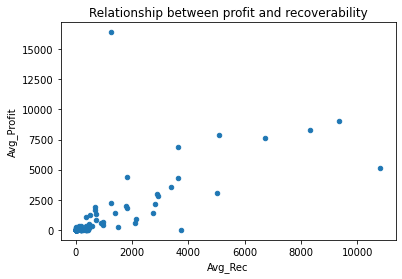

In [108]:
# No scaling
df.plot.scatter(x ='Avg_Rec', y ='Avg_Profit', title = 'Relationship between profit and recoverability')

<AxesSubplot:title={'center':'Relationship between profit and recoverability'}, xlabel='Avg_Rec', ylabel='Avg_Profit'>

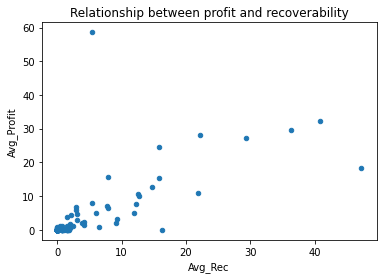

In [109]:
# Standardisation
df_std = df.copy()
df_std[['Avg_Rec', 'Avg_Profit']] = StandardScaler().fit_transform(df_std[['Avg_Rec', 'Avg_Profit']])
df_std.plot.scatter(x ='Avg_Rec', y ='Avg_Profit', title = 'Relationship between profit and recoverability')

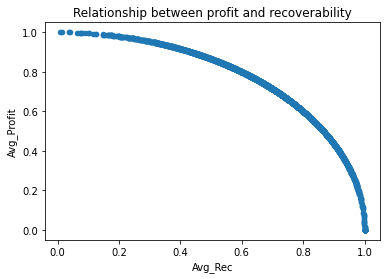

In [110]:
# Normalization
df_norm = df.copy()
df_norm[['Avg_Rec', 'Avg_Profit']] = preprocessing.normalize(df_norm[['Avg_Rec', 'Avg_Profit']])
df_norm.plot.scatter(x ='Avg_Rec', y ='Avg_Profit', title = 'Relationship between profit and recoverability')
df = df_norm

### 3.4 <a class="anchor" id="3_4"></a> Feature engineering

#### 3.4.1 <a class="anchor" id="3_4_1"></a> Recoverability

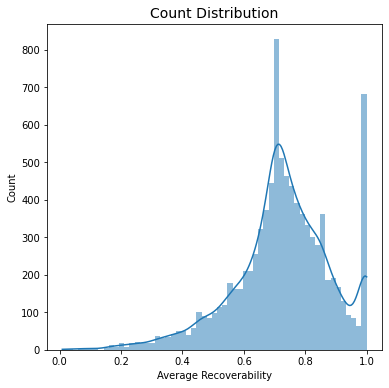

In [111]:
# Distribution of count of all points, with outliers
plt.figure(figsize=(6,6))
sns.histplot(df['Avg_Rec'], kde=True, linewidth=0)
plt.xlabel('Average Recoverability')
plt.title('Count Distribution', size=14)
plt.savefig('figures/eda/Recoverability count distribution.png')
plt.show()

<AxesSubplot:>

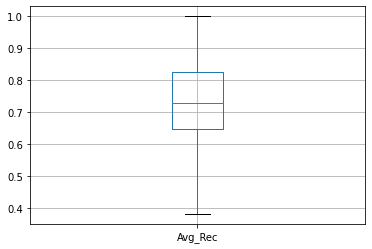

In [112]:
df.boxplot('Avg_Rec', showfliers=False) # boxplot without outliers, the green line corresponds to the median

Interpretation: https://www.mathbootcamps.com/how-to-read-a-boxplot/

<AxesSubplot:>

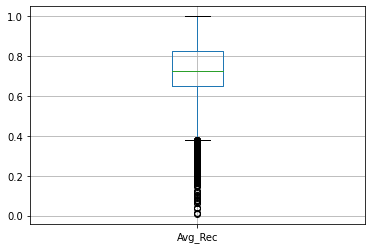

In [113]:
df.boxplot('Avg_Rec')

In [114]:
# Calculate the minimum and maximum bounds aside outliers
q25, q75 = percentile(df['Avg_Rec'], 25), percentile(df['Avg_Rec'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower, upper, df['Avg_Rec'].median())

0.3812026637360993 1.0945939828618954 0.7273934194103241


Now we can create 3 recoverability classes based on the median recoverability as our threshold.

In [115]:
rec_class = {}
for rec in df['Avg_Rec']:
  if rec < 0.36815858766524:
    rec_class[rec] = 0  # nearly unrecoverable projects are all outliers below the lower bound
  elif rec > 0.7327905817411604:
    rec_class[rec] = 2 # very recoverable projects are higher than median
  else:
    rec_class[rec] = 1 # average recoverable projects are those between the median and lower bound

In [116]:
rec_class_df = pd.DataFrame([{'Avg_Rec': rec, 'Rec_Class': rec_class} for (rec, rec_class) in rec_class.items()])
rec_class_df

,Avg_Rec,Rec_Class
0,0.901941,2
1,1.000000,2
2,0.832050,2
3,0.782964,2
4,0.750596,2
...,...,...
7913,0.955782,2
7914,0.755472,2
7915,0.642735,1
7916,0.716994,1


#### 3.4.2 <a class="anchor" id="3_4_2"></a> Profit

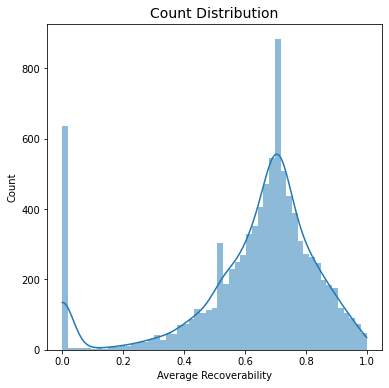

In [117]:
# Distribution of count of all points, with outliers
plt.figure(figsize=(6,6))
sns.histplot(df['Avg_Profit'], kde=True, linewidth=0)
plt.xlabel('Average Recoverability')
plt.title('Count Distribution', size=14)
plt.savefig('figures/eda/Profitability count distribution.png')
plt.show()

<AxesSubplot:>

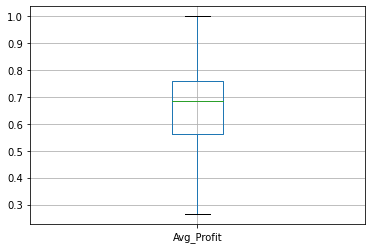

In [118]:
df.boxplot('Avg_Profit', showfliers=False) # boxplot without outliers, the green line corresponds to the median

<AxesSubplot:>

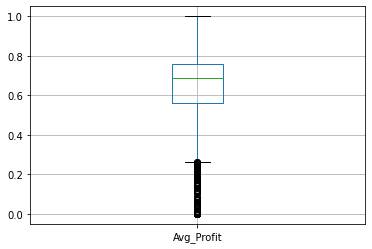

In [119]:
df.boxplot('Avg_Profit')

In [120]:
# Calculate the minimum and maximum bounds aside outliers
q25, q75 = percentile(df['Avg_Profit'], 25), percentile(df['Avg_Profit'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower, upper, df['Avg_Profit'].median())

0.26370398338102413 1.0594150778273055 0.686220673980722


Now we can create 3 profit measure classes based on the median profit measurement as our threshold.

In [121]:
profit_class = {}
for pr in df['Avg_Profit']:
  if pr < 0.21301326350608785:
    profit_class[pr] = 0  # nearly unprofitable projects are all outliers below the lower bound
  elif pr > 0.6804542330762973:
    profit_class[pr] = 2 # very profitable projects are higher than median
  else:
    profit_class[pr] = 1 # average profitable projects are those between the median and lower bound

In [122]:
pr_class_df = pd.DataFrame([{'Avg_Profit': pr, 'Profit_Class': profit_class} for (pr, profit_class) in profit_class.items()])
pr_class_df

,Avg_Profit,Profit_Class
0,0.431859,1
1,0.000000,0
2,0.554700,1
3,0.622067,1
4,0.660761,1
...,...,...
7911,0.294077,1
7912,0.655181,1
7913,0.766088,2
7914,0.697079,2


#### 3.4.3 <a class="anchor" id="3_4_3"></a> Incorporation of new classes

In [123]:
df = pd.merge(df, rec_class_df,  how='left', on='Avg_Rec')
df = pd.merge(df, pr_class_df,  how='left', on='Avg_Profit')

### 3.5 <a class="anchor" id="3_3"></a> Encoding

#### 3.5.1 <a class="anchor" id="3_5_1"></a> One hot encoding

In [125]:
cat_vars = (df.select_dtypes(include=object))
cat_vars.columns

Index(['Country', 'Office', 'Sector', 'Default_Rate_Group', 'Manager_Team',
       'Director_Team'],
      dtype='object')

In [126]:
df['Country'].nunique()

11

In [127]:
df['Office'].nunique()

8

In [128]:
df['Sector'].nunique()

12

In [129]:
df['Default_Rate_Group'].nunique()

2

In [130]:
df['Manager_Team'].nunique()

22

In [131]:
df['Manager_Team'].value_counts()

SA - Civil                         2149
SA - Industrial                    1748
SA - Buildings                     1720
VIC - Buildings                    1046
All Staff                           413
VIC - Support Services              333
Group - Support Services            299
WA - Structural                     240
WA - Industrial                     200
WA - Maritime                       188
NZ - Water                          138
QLD - QLD                           125
WA - Civil                          124
VIC - Traffic                       122
WA - Project Delivery Services      108
SA - Project Delivery Services       88
VIC - Infrastructure                 83
VIC - Industrial                     81
VIC - Project Delivery Services      52
WA - Support Services                21
VIC - Geotechnical                   20
SA - Finance                          1
Name: Manager_Team, dtype: int64

In [132]:
for x in df['Manager_Team']:
    if x.startswith('SA') == True:
        df['Manager_Team'].mask(df['Manager_Team'] == x, 'SA', inplace=True)
    elif x.startswith('VIC') == True:
        df['Manager_Team'].mask(df['Manager_Team'] == x, 'VIC', inplace=True)
    elif x.startswith('WA') == True:
        df['Manager_Team'].mask(df['Manager_Team'] == x, 'WA', inplace=True)
    elif x.startswith('NZ') == True:
        df['Manager_Team'].mask(df['Manager_Team'] == x, 'NZ', inplace=True)
    elif x.startswith('QLD') == True:
        df['Manager_Team'].mask(df['Manager_Team'] == x, 'QLD', inplace=True)

In [133]:
df['Manager_Team'].value_counts()

SA                          5706
VIC                         1737
WA                           881
All Staff                    413
Group - Support Services     299
NZ                           138
QLD                          125
Name: Manager_Team, dtype: int64

In [134]:
df['Manager_Team'].nunique()

7

In [135]:
df['Director_Team'].nunique()

16

In [136]:
df['Director_Team'].value_counts()

SA - Buildings                    2381
SA - Industrial                   1919
SA - Civil                        1667
VIC - Support Services            1448
WA - Maritime                      666
Group - Support Services           601
VIC - Buildings                    184
WA - Structural                    136
SA - Project Delivery Services      87
WA - Civil                          73
VIC - Traffic                       61
VIC - Infrastructure                47
VIC - Geotechnical                  10
All Staff                            8
QLD - QLD                            6
NZ - Water                           5
Name: Director_Team, dtype: int64

In [137]:
for x in df['Director_Team']:
    if x.startswith('SA') == True:
        df['Director_Team'].mask(df['Director_Team'] == x, 'SA', inplace=True)
    elif x.startswith('VIC') == True:
        df['Director_Team'].mask(df['Director_Team'] == x, 'VIC', inplace=True)
    elif x.startswith('WA') == True:
        df['Director_Team'].mask(df['Director_Team'] == x, 'WA', inplace=True)
    elif x.startswith('NZ') == True:
        df['Director_Team'].mask(df['Director_Team'] == x, 'NZ', inplace=True)
    elif x.startswith('QLD') == True:
        df['Director_Team'].mask(df['Director_Team'] == x, 'QLD', inplace=True)

In [138]:
df['Director_Team'].value_counts()

SA                          6054
VIC                         1750
WA                           875
Group - Support Services     601
All Staff                      8
QLD                            6
NZ                             5
Name: Director_Team, dtype: int64

In [139]:
df['Director_Team'].nunique()

7

In [140]:
df_extended = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
df_extended

,Project_Size_Sort_Order,Project_Duration_Weeks,Total_Num_Stages,Is_Multi_Discipline_Project,Is_First_Client_Project,Perc_of_Stages_with_Fixed_Fee,Manager_ID,Manager_Is_Recent,Manager_Empl_Months,Director_ID,Director_Is_Recent,Director_Empl_Months,Perc_of_Subcontractors,Is_Front_Loaded,Delivered_on_Time,Suffered_Data_Loss,Total_Data_Issues,Avg_Rec,Avg_Profit,Rec_Class,Profit_Class,Country_Botswana,Country_China,Country_New Zealand,Country_Papua New Guinea,Country_Peru,Country_Samoa,Country_Saudi Arabia,Country_Tonga,Country_United Arab Emirates,Country_Zambia,Office_Inception Consulting Engineers Pty Ltd,Office_WGANZ Pty Ltd,Office_WGAQLD Pty Ltd,Office_WGASA Pty Ltd,Office_WGAVIC Pty Ltd,Office_WGAWA Pty Ltd,Office_Whyalla,Sector_Commercial & Retail Buildings,Sector_Defence & Space,Sector_Energy,Sector_Health & Aged Care,"Sector_Justice, Corrections & Emergency Services",Sector_Ports & Marine,Sector_Resources,Sector_Sport & Recreation Facilities,Sector_Traffic Transport (Bridges),Sector_Urban development,Sector_Water/Waste,Default_Rate_Group_Standard,Manager_Team_Group - Support Services,Manager_Team_NZ,Manager_Team_QLD,Manager_Team_SA,Manager_Team_VIC,Manager_Team_WA,Director_Team_Group - Support Services,Director_Team_NZ,Director_Team_QLD,Director_Team_SA,Director_Team_VIC,Director_Team_WA
0,4.0,4.0,5.0,0.0,1.0,0.80,7612852,0,127.0,7612709.0,False,433.0,0.0,1,True,1,2.0,0.901941,0.431859,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,1.0,238.0,4.0,0.0,1.0,0.00,7612773,0,319.0,7612747.0,False,433.0,0.0,0,True,0,2.0,1.000000,0.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1.0,0.0,2.0,0.0,1.0,0.00,7612773,0,319.0,7612768.0,False,339.0,0.0,0,True,0,0.0,0.832050,0.554700,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,3.0,121.0,4.0,0.0,1.0,0.25,7612773,0,319.0,7612709.0,False,433.0,0.0,0,True,0,1.0,0.782964,0.622067,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,7.0,2.0,6.0,0.0,1.0,0.00,7612695,0,421.0,7612695.0,False,421.0,0.0,0,True,0,3.0,1.000000,0.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9294,3.0,18.0,2.0,0.0,0.0,1.00,7612752,0,178.0,7612691.0,False,176.0,0.0,0,True,0,1.0,0.853686,0.520788,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9295,1.0,1.0,3.0,0.0,0.0,0.67,9501752,0,12.0,7859152.0,False,29.0,0.0,0,True,0,1.0,0.853686,0.520788,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9296,1.0,1.0,2.0,0.0,0.0,0.50,7809410,0,29.0,10018105.0,True,6.0,0.0,0,True,0,1.0,0.853686,0.520788,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9297,1.0,3.0,1.0,0.0,0.0,1.00,7612860,0,170.0,7612841.0,False,288.0,0.0,0,True,0,0.0,0.853686,0.520788,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


#### 3.5.2 <a class="anchor" id="3_5_2"></a> Label encoding

In [141]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Office'] = le.fit_transform(df['Office'])
df['Sector'] = le.fit_transform(df['Sector'])
df['Default_Rate_Group'] = le.fit_transform(df['Default_Rate_Group'])
df['Manager_Team'] = le.fit_transform(df['Manager_Team'])
df['Director_Team'] = le.fit_transform(df['Director_Team'])
df['Director_Is_Recent'] = df['Director_Is_Recent']*1
df['Delivered_on_Time'] = df['Delivered_on_Time']*1

## Part 4: <a class="anchor" id="part4"></a> Exploratory data analysis

### 4.1 <a class="anchor" id="4_1"></a> Target variables

In [142]:
all_bins = pd.DataFrame(df, columns = ['Avg_Rec', 'Avg_Profit'])
bins_prep = pd.merge(all_bins, rec_class_df,  how='left', on='Avg_Rec')
bins_prep = pd.merge(bins_prep, pr_class_df,  how='left', on='Avg_Profit')
bins_prep

,Avg_Rec,Avg_Profit,Rec_Class,Profit_Class
0,0.901941,0.431859,2,1
1,1.000000,0.000000,2,0
2,0.832050,0.554700,2,1
3,0.782964,0.622067,2,1
4,1.000000,0.000000,2,0
...,...,...,...,...
9294,0.853686,0.520788,2,1
9295,0.853686,0.520788,2,1
9296,0.853686,0.520788,2,1
9297,0.853686,0.520788,2,1


In [143]:
bins_prep['Rec_Class'].value_counts()

1    4529
2    4483
0     287
Name: Rec_Class, dtype: int64

In [144]:
rec_classes = pd.DataFrame({'categories': ['unrecoverable', 'average', 'highly recoverable'],
                              'project_count': [287, 4529, 4815]})

Text(0.5, 0, 'Recoverability category')

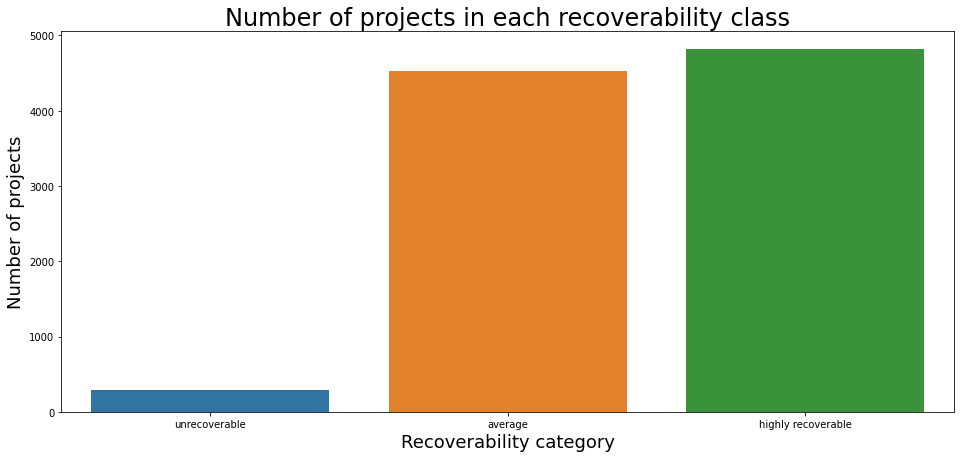

In [145]:
plt.figure(figsize=(16,7))
ax = sns.barplot(x = 'categories', y = 'project_count', data = rec_classes)
plt.title('Number of projects in each recoverability class', fontsize=24)
plt.ylabel('Number of projects', fontsize=18)
plt.xlabel('Recoverability category', fontsize=18)

In [146]:
bins_prep['Profit_Class'].value_counts()

2    4815
1    3783
0     701
Name: Profit_Class, dtype: int64

In [147]:
pr_classes = pd.DataFrame({'categories': ['unprofitable', 'average', 'highly profitable'],
                              'project_count': [701, 4115, 4815]})

Text(0.5, 0, 'Profitability category')

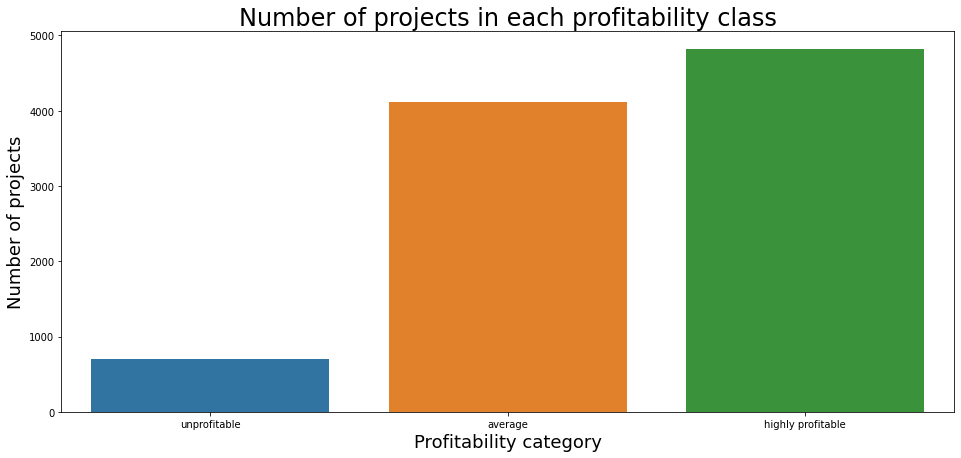

In [148]:
plt.figure(figsize=(16,7))
ax = sns.barplot(x = 'categories', y = 'project_count', data = pr_classes)
plt.title('Number of projects in each profitability class', fontsize=24)
plt.ylabel('Number of projects', fontsize=18)
plt.xlabel('Profitability category', fontsize=18)

### 4.2 <a class="anchor" id="4_2"></a> Extended dataframe

C:\Users\MarfaPopova\AppData\Local\Temp\ipykernel_13448\1043530953.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#f68c1f', alpha=0.1)


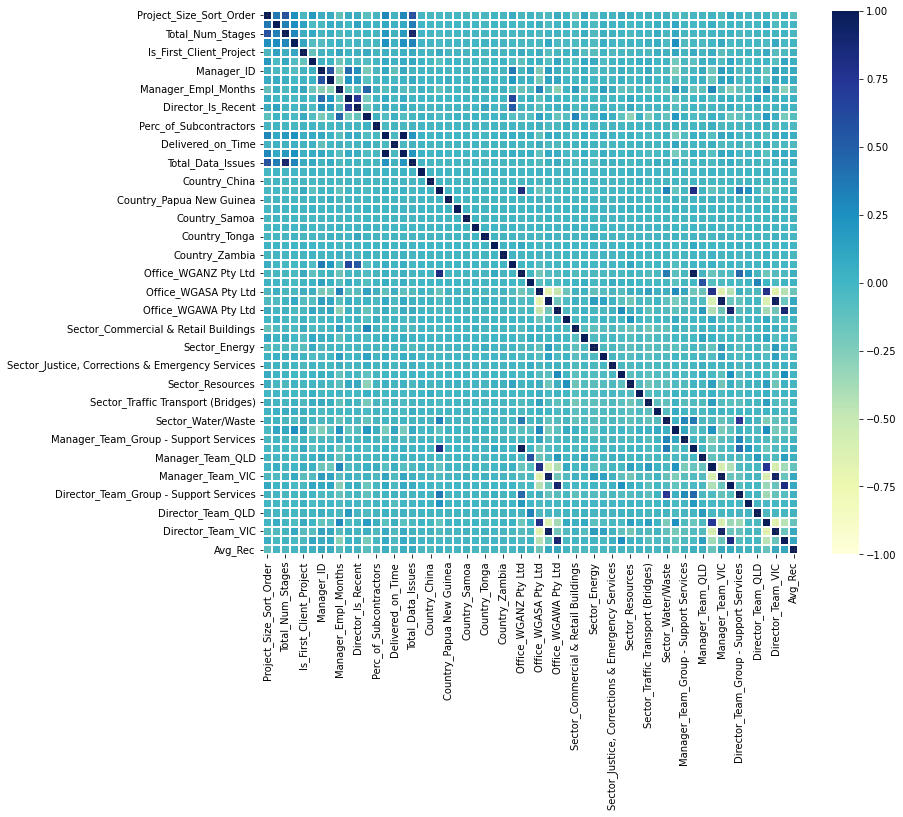

In [149]:
X = df_extended.drop(['Avg_Rec', 'Avg_Profit', 'Rec_Class', 'Profit_Class'], axis = 1).copy()
X['Avg_Rec'] = df['Avg_Rec']

corr = X.corr()
plt.figure(figsize = (12,10))

sns.heatmap(round(corr, 3), vmin=-1, vmax=1, cmap='YlGnBu', linewidths=.2)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

### 4.3 <a class="anchor" id="4_3"></a> Compact dataframe

C:\Users\MarfaPopova\AppData\Local\Temp\ipykernel_13448\448219302.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#f68c1f', alpha=0.1)


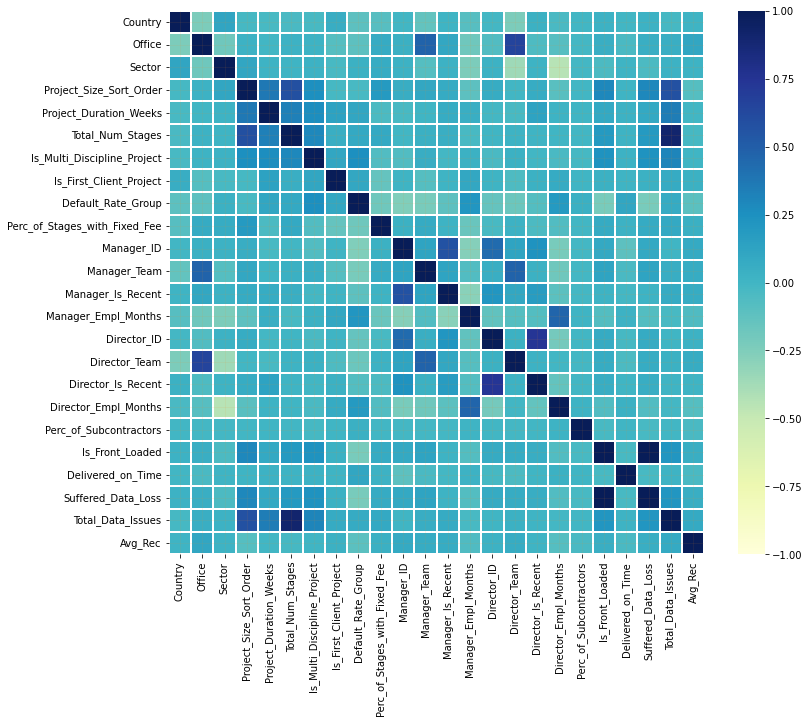

In [153]:
X = df.drop(['Avg_Rec', 'Avg_Profit', 'Rec_Class', 'Profit_Class'], axis = 1).copy()
X['Avg_Rec'] = df['Avg_Rec']

corr = X.corr()
plt.figure(figsize = (12,10))

sns.heatmap(round(corr, 3), vmin=-1, vmax=1, cmap='YlGnBu', linewidths=.2)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

In [154]:
# URL: https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

# Create correlation matrix
corr_mat = X.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and make Lower triangular values Null
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

Director_Empl_Months  Sector                    -0.438896
Director_Team         Sector                    -0.358693
Manager_Empl_Months   Manager_Is_Recent         -0.281878
                      Manager_ID                -0.266675
Manager_ID            Default_Rate_Group        -0.254002
                                                   ...   
Total_Num_Stages      Project_Size_Sort_Order    0.581123
Director_Team         Office                     0.650240
Director_Is_Recent    Director_ID                0.735133
Total_Data_Issues     Total_Num_Stages           0.911368
Suffered_Data_Loss    Is_Front_Loaded            1.000000
Length: 276, dtype: float64


C:\Users\MarfaPopova\AppData\Local\Temp\ipykernel_13448\3050897398.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


### 4.4 <a class="anchor" id="4_4"></a> Outliers

In [155]:
# URL: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

# seed the random number generator
seed(1)

# calculate interquartile range
q25, q75 = percentile(df['Avg_Rec'], 25), percentile(df['Avg_Rec'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df['Avg_Rec'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df['Avg_Rec'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=0.649, 75th=0.827, IQR=0.178
Identified outliers: 315
Non-outlier observations: 8984


In [156]:
# seed the random number generator
seed(1)

# calculate interquartile range
q25, q75 = percentile(df['Avg_Profit'], 25), percentile(df['Avg_Profit'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df['Avg_Profit'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df['Avg_Profit'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=0.562, 75th=0.761, IQR=0.199
Identified outliers: 751
Non-outlier observations: 8548


In [157]:
#URL: https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-pandas-columns-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [159]:
df.to_csv('../csv-files/multiclass_data.csv', index=False)